In [ ]:

import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Image Classification/train"
training_data = []
class_names=[]
for dirc in os.listdir(path):
    new = os.path.join(path, dirc)
    for img in os.listdir(new):
        class_names.append(dirc)

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
#dataset loading
path = "/content/drive/MyDrive/Image Classification/train"
from posixpath import pathsep
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3)

# Note that the validation data should not be augmented!
#test_datagen = ImageDataGenerator( rescale = 1.0/255, subset='validation')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path,
                                                    batch_size = 20,
                                                    target_size = (220, 220),
                                                    class_mode='categorical'
                                                    ,subset='training')     
test_generator = train_datagen.flow_from_directory(path,
                                                    batch_size = 20,
                                                    target_size = (220, 220)
                                                    ,class_mode='categorical'
                                                    ,subset='validation') 


Found 3940 images belonging to 94 classes.
Found 1657 images belonging to 94 classes.


In [ ]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

## Loading VGG19 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
#InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

## Loading InceptionV3 model
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

## Loading InceptionResNetV2 model
base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
#Xception
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

## Loading Xception model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.2 MB/s 


In [ ]:
from keras.applications.mobilenet import MobileNet

In [ ]:
from keras.applications.mobilenet import preprocess_input
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
base_model = DenseNet169(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
base_model = DenseNet169(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

In [ ]:
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input
base_model = DenseNet201(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

74850304/74836368 [==============================] - 2s 0us/step


In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

In [ ]:
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input
base_model = ResNet101(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weights

171458560/171446536 [==============================] - 3s 0us/step


In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


In [ ]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet101V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


In [ ]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet101V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False 

In [ ]:
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
base_model = ResNet152V2(weights="imagenet", include_top=False, input_shape=(220,220,3))
base_model.trainable = False ## Not trainable weightsfrom keras.applications.resnet_v2 import ResNet50V2


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
#Buiding model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(94, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
#Compiling and training
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    
    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
#callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 5,
            epochs = 100,
            validation_steps = 10,
            verbose = 2,
            callbacks=[es])

Epoch 1/100
5/5 - 188s - loss: 8.8247 - accuracy: 0.0000e+00 - val_loss: 9.0821 - val_accuracy: 0.0350 - 188s/epoch - 38s/step
Epoch 2/100
5/5 - 163s - loss: 7.8303 - accuracy: 0.0500 - val_loss: 5.6828 - val_accuracy: 0.0200 - 163s/epoch - 33s/step
Epoch 3/100
5/5 - 150s - loss: 4.9866 - accuracy: 0.0300 - val_loss: 4.7270 - val_accuracy: 0.0200 - 150s/epoch - 30s/step
Epoch 4/100
5/5 - 137s - loss: 4.6681 - accuracy: 0.0000e+00 - val_loss: 4.6373 - val_accuracy: 0.0250 - 137s/epoch - 27s/step
Epoch 5/100
5/5 - 124s - loss: 4.5416 - accuracy: 0.0100 - val_loss: 4.5088 - val_accuracy: 0.0350 - 124s/epoch - 25s/step
Epoch 6/100
5/5 - 113s - loss: 4.5363 - accuracy: 0.0400 - val_loss: 4.5305 - val_accuracy: 0.0350 - 113s/epoch - 23s/step
Epoch 7/100
5/5 - 113s - loss: 4.5137 - accuracy: 0.0300 - val_loss: 4.5142 - val_accuracy: 0.0250 - 113s/epoch - 23s/step
Epoch 8/100
5/5 - 111s - loss: 4.4637 - accuracy: 0.0100 - val_loss: 4.5647 - val_accuracy: 0.0150 - 111s/epoch - 22s/step
Epoch 9/

In [ ]:
#getting actual test labels
import math
number_of_examples = len(test_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 20)) 
# 1.0 above is to skip integer division
test_labels = []
for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_generator[i][1]))

In [ ]:
#getting labels
y_test=[]
for i in test_labels:
  y_test.append(np.argmax(test_labels))

In [ ]:
#getting a random image from test set
i = 5
img = test_generator[i][0][4]
lable = test_generator[i][1][4]
print(np.array(img).shape, np.array(lable).shape)

(220, 220, 3) (94,)


In [ ]:
#testing individual image
pred = model.predict(np.array(img).reshape(1,220,220,3))
x= np.argmax(pred)
print(x)
print(np.argmax(lable))

54
49


In [ ]:
#testing test set
y = model.predict(test_generator)

In [ ]:
#getting classes of test set
y_pred=[]
for i in y:
  y_pred.append(np.argmax(y))

In [ ]:
print(np.array(y_test).shape)
print(np.array(y_pred).shape)

(1657,)
(1657,)


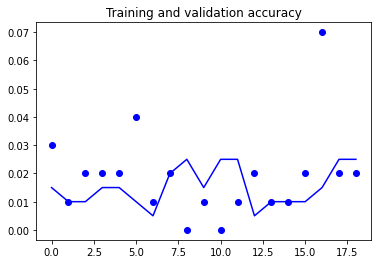

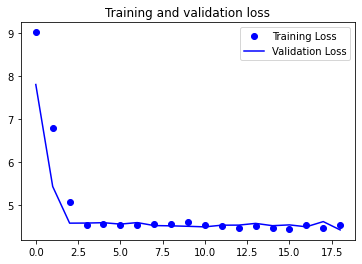

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()